In [173]:
import pandas as pd
from matplotlib.pyplot import show , plot , xlabel , ylabel ,title ,figure 
import numpy as np

In [174]:
file = pd.read_csv('https://raw.githubusercontent.com//jbrownlee//Datasets//master//daily-min-temperatures.csv')
file.to_csv('D:\\datasets\\Temp_time_series\\temp_time_series.csv')
df = file.copy()
df.sample(10)

,Date,Temp
3006,1989-03-28,11.8
3051,1989-05-12,12.7
2629,1988-03-15,13.4
3607,1990-11-19,9.9
2061,1986-08-25,5.9
3244,1989-11-21,13.2
932,1983-07-22,5.3
1117,1984-01-23,10.5
1969,1986-05-25,8.5
1989,1986-06-14,7.0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


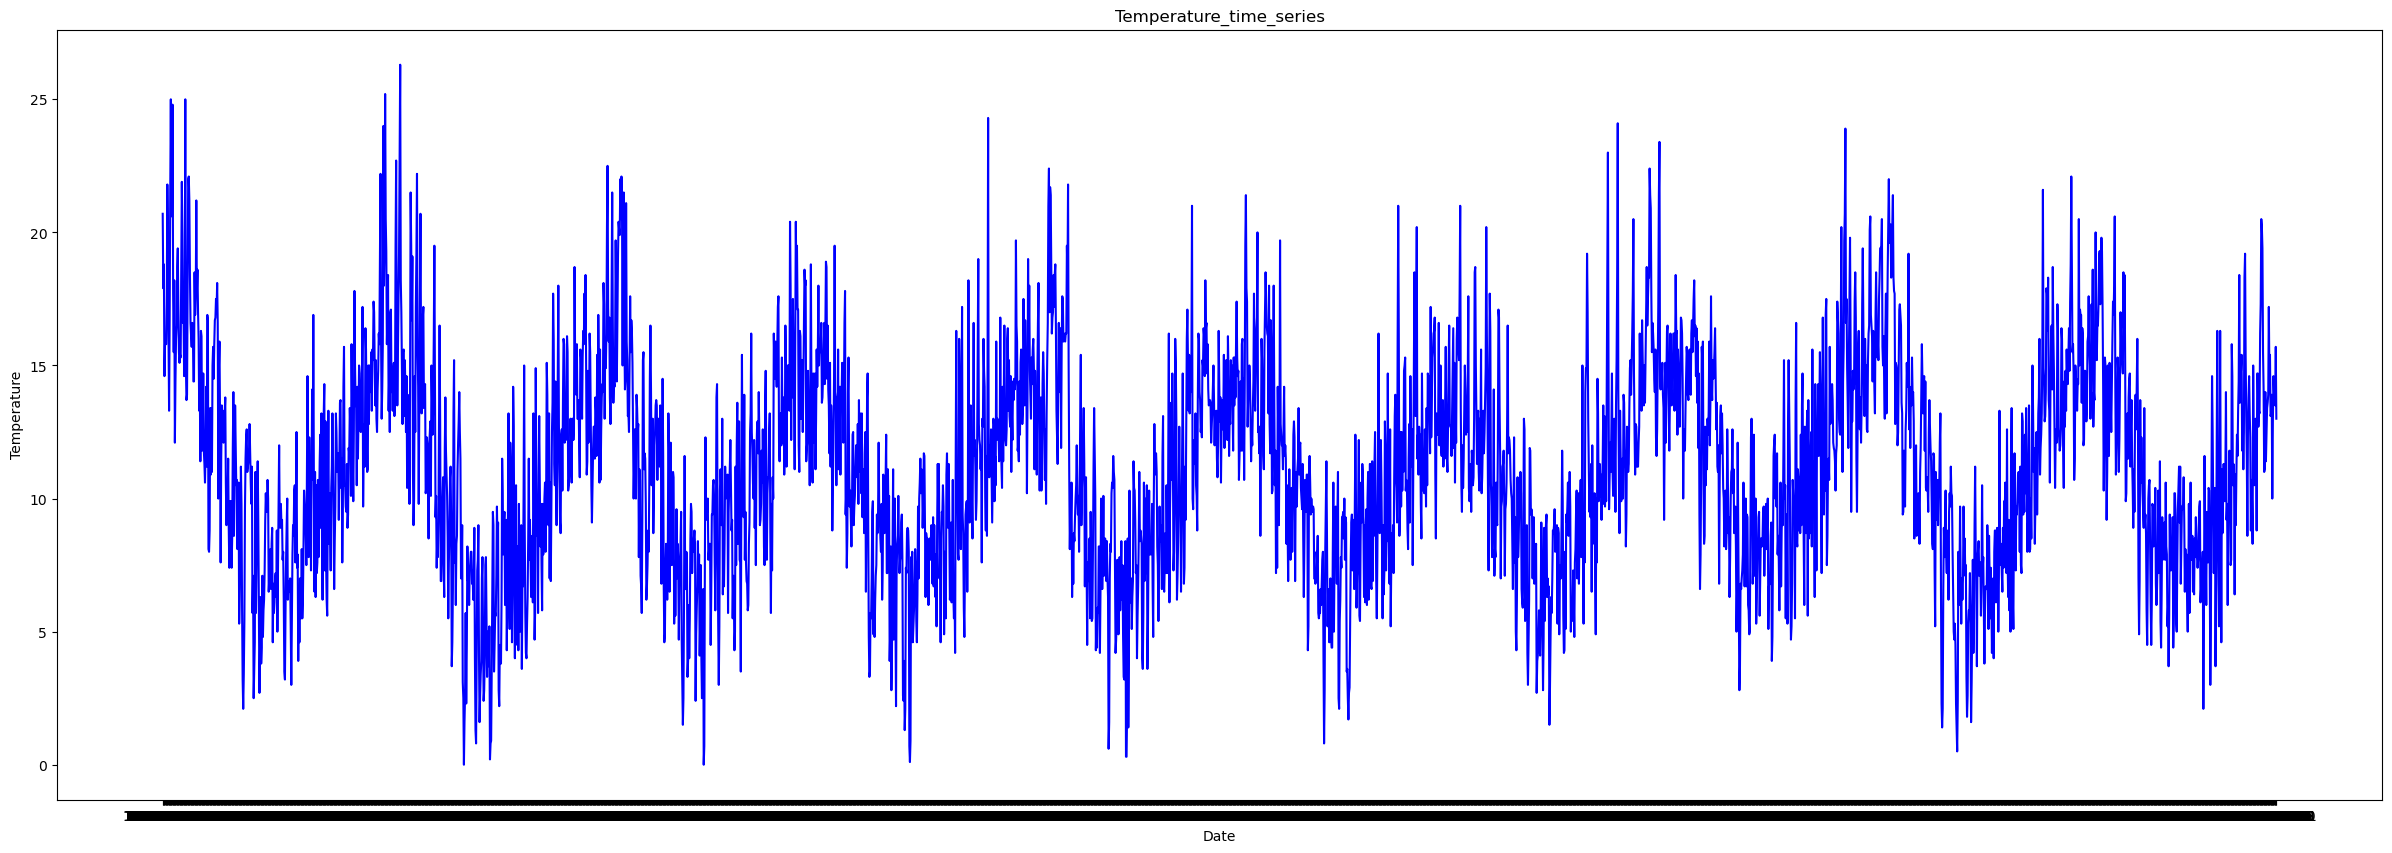

In [176]:
figure(figsize=(30,10))
plot(df.Date,df.Temp,'blue')
xlabel('Date')
ylabel('Temperature')
title('Temperature_time_series')
show()

In [177]:
from tensorflow.data import Dataset

In [178]:
idx = (int(input('Enter train size :'))*len(list(df.Temp)))//100
xtr = df.Temp.to_numpy()[:idx]
ytr = df.Date.to_numpy()[:idx]
xts = df.Temp.to_numpy()[idx:]
yts = df.Date.to_numpy()[idx:]

Enter train size :90


In [179]:
print(f'There are {len(xtr)} samples for training and {len(xts)} for testing')

There are 3285 samples for training and 365 for testing


In [180]:
dataset = Dataset.from_tensor_slices(xtr)
dataset = dataset.window(42,shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda x : x.batch(42))
dataset = dataset.shuffle(2100).map(lambda x : (x[:-1],x[-1]))
dataset = dataset.batch(67).prefetch(1)

In [181]:
from tensorflow.keras import layers , models
from tensorflow.keras.losses import Huber
from tensorflow import expand_dims

In [182]:
model = models.Sequential([layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
                          layers.Dense(1)])
model.compile(optimizer='rmsprop',loss=Huber(),metrics=['mae'])

In [183]:
history = model.fit(dataset,epochs=15)

Epoch 1/15
49/49 [==============================] - 2s 23ms/step - loss: 9.3715 - mae: 9.8698
Epoch 2/15
49/49 [==============================] - 2s 25ms/step - loss: 6.4046 - mae: 6.8961
Epoch 3/15
49/49 [==============================] - 2s 23ms/step - loss: 4.4534 - mae: 4.9323
Epoch 4/15
49/49 [==============================] - 2s 23ms/step - loss: 3.4254 - mae: 3.8981
Epoch 5/15
49/49 [==============================] - 2s 24ms/step - loss: 2.9912 - mae: 3.4592
Epoch 6/15
49/49 [==============================] - 2s 25ms/step - loss: 2.8249 - mae: 3.2933
Epoch 7/15
49/49 [==============================] - 2s 25ms/step - loss: 2.7910 - mae: 3.2598
Epoch 8/15
49/49 [==============================] - 2s 24ms/step - loss: 2.7825 - mae: 3.2508
Epoch 9/15
49/49 [==============================] - 2s 24ms/step - loss: 2.7768 - mae: 3.2450
Epoch 10/15
49/49 [==============================] - 2s 26ms/step - loss: 2.7747 - mae: 3.2431
Epoch 11/15
49/49 [==============================] - 1s 24m

In [185]:
from tensorflow.keras.metrics import mean_squared_error , mean_absolute_error

In [190]:
preds = model.predict(xts[np.newaxis])

1/1 [==============================] - 0s 48ms/step


In [205]:
mse = np.mean(mean_squared_error(xts,preds).numpy()[0])
mae = np.mean(mean_absolute_error(xts,preds).numpy()[0])
print(f'mse : {mse:.2f} and mae : {mae:.2f}')

mse : 15.38 and mae : 3.24
